In [289]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')



In [290]:
#importing dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/churn_prediction_project.csv')

In [291]:
#information about data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [292]:
#No. of missing values in each variable 
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [293]:
#Treating Of missing Values
   
#replacing all the missing values of independent categorical variables with mode
categorical_columns = ['gender' , 'dependents' , 'occupation' , 'city']
from sklearn.impute import SimpleImputer
#creating an instance of SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'most_frequent')
data[categorical_columns] = imputer.fit_transform(data[categorical_columns])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          28382 non-null  object 
 4   dependents                      28382 non-null  float64
 5   occupation                      28382 non-null  object 
 6   city                            28382 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [294]:
#dropping customer_id from data and calculating correlation matrix 
data = data.drop(columns = ['customer_id'])
data.corr()


,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
vintage,1.000000,0.006220,0.004560,0.008378,-0.001154,0.003512,0.000031,-0.000669,-0.002054,-0.001759,-0.004617,-0.000169,-0.004978,-0.006760,-0.000550,-0.002208,-0.004769
age,0.006220,1.000000,0.001261,0.014564,-0.076532,-0.058990,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,0.004560,0.001261,1.000000,0.003287,0.007917,-0.001704,-0.003838,-0.002181,-0.001786,-0.001967,0.003542,0.025848,0.008225,0.030746,-0.002769,-0.001672,0.029335
city,0.008378,0.014564,0.003287,1.000000,0.009323,-0.055779,-0.006220,-0.004634,-0.006799,-0.008213,0.003802,0.007335,0.001231,0.005448,-0.006355,-0.006318,-0.000883
customer_nw_category,-0.001154,-0.076532,0.007917,0.009323,1.000000,0.235059,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,0.003512,-0.058990,-0.001704,-0.055779,0.235059,1.000000,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
current_balance,0.000031,0.054346,-0.003838,-0.006220,-0.058314,0.000181,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,-0.000669,0.058342,-0.002181,-0.004634,-0.059854,0.000214,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886
average_monthly_balance_prevQ,-0.002054,0.061708,-0.001786,-0.006799,-0.059535,0.001955,0.958307,0.970530,1.000000,0.763495,0.033639,0.085699,0.060579,0.121272,0.976290,0.994038,0.011960
average_monthly_balance_prevQ2,-0.001759,0.059607,-0.001967,-0.008213,-0.047010,0.001310,0.714600,0.722998,0.763495,1.000000,0.036271,0.062264,0.045239,0.102519,0.725826,0.736635,0.018376


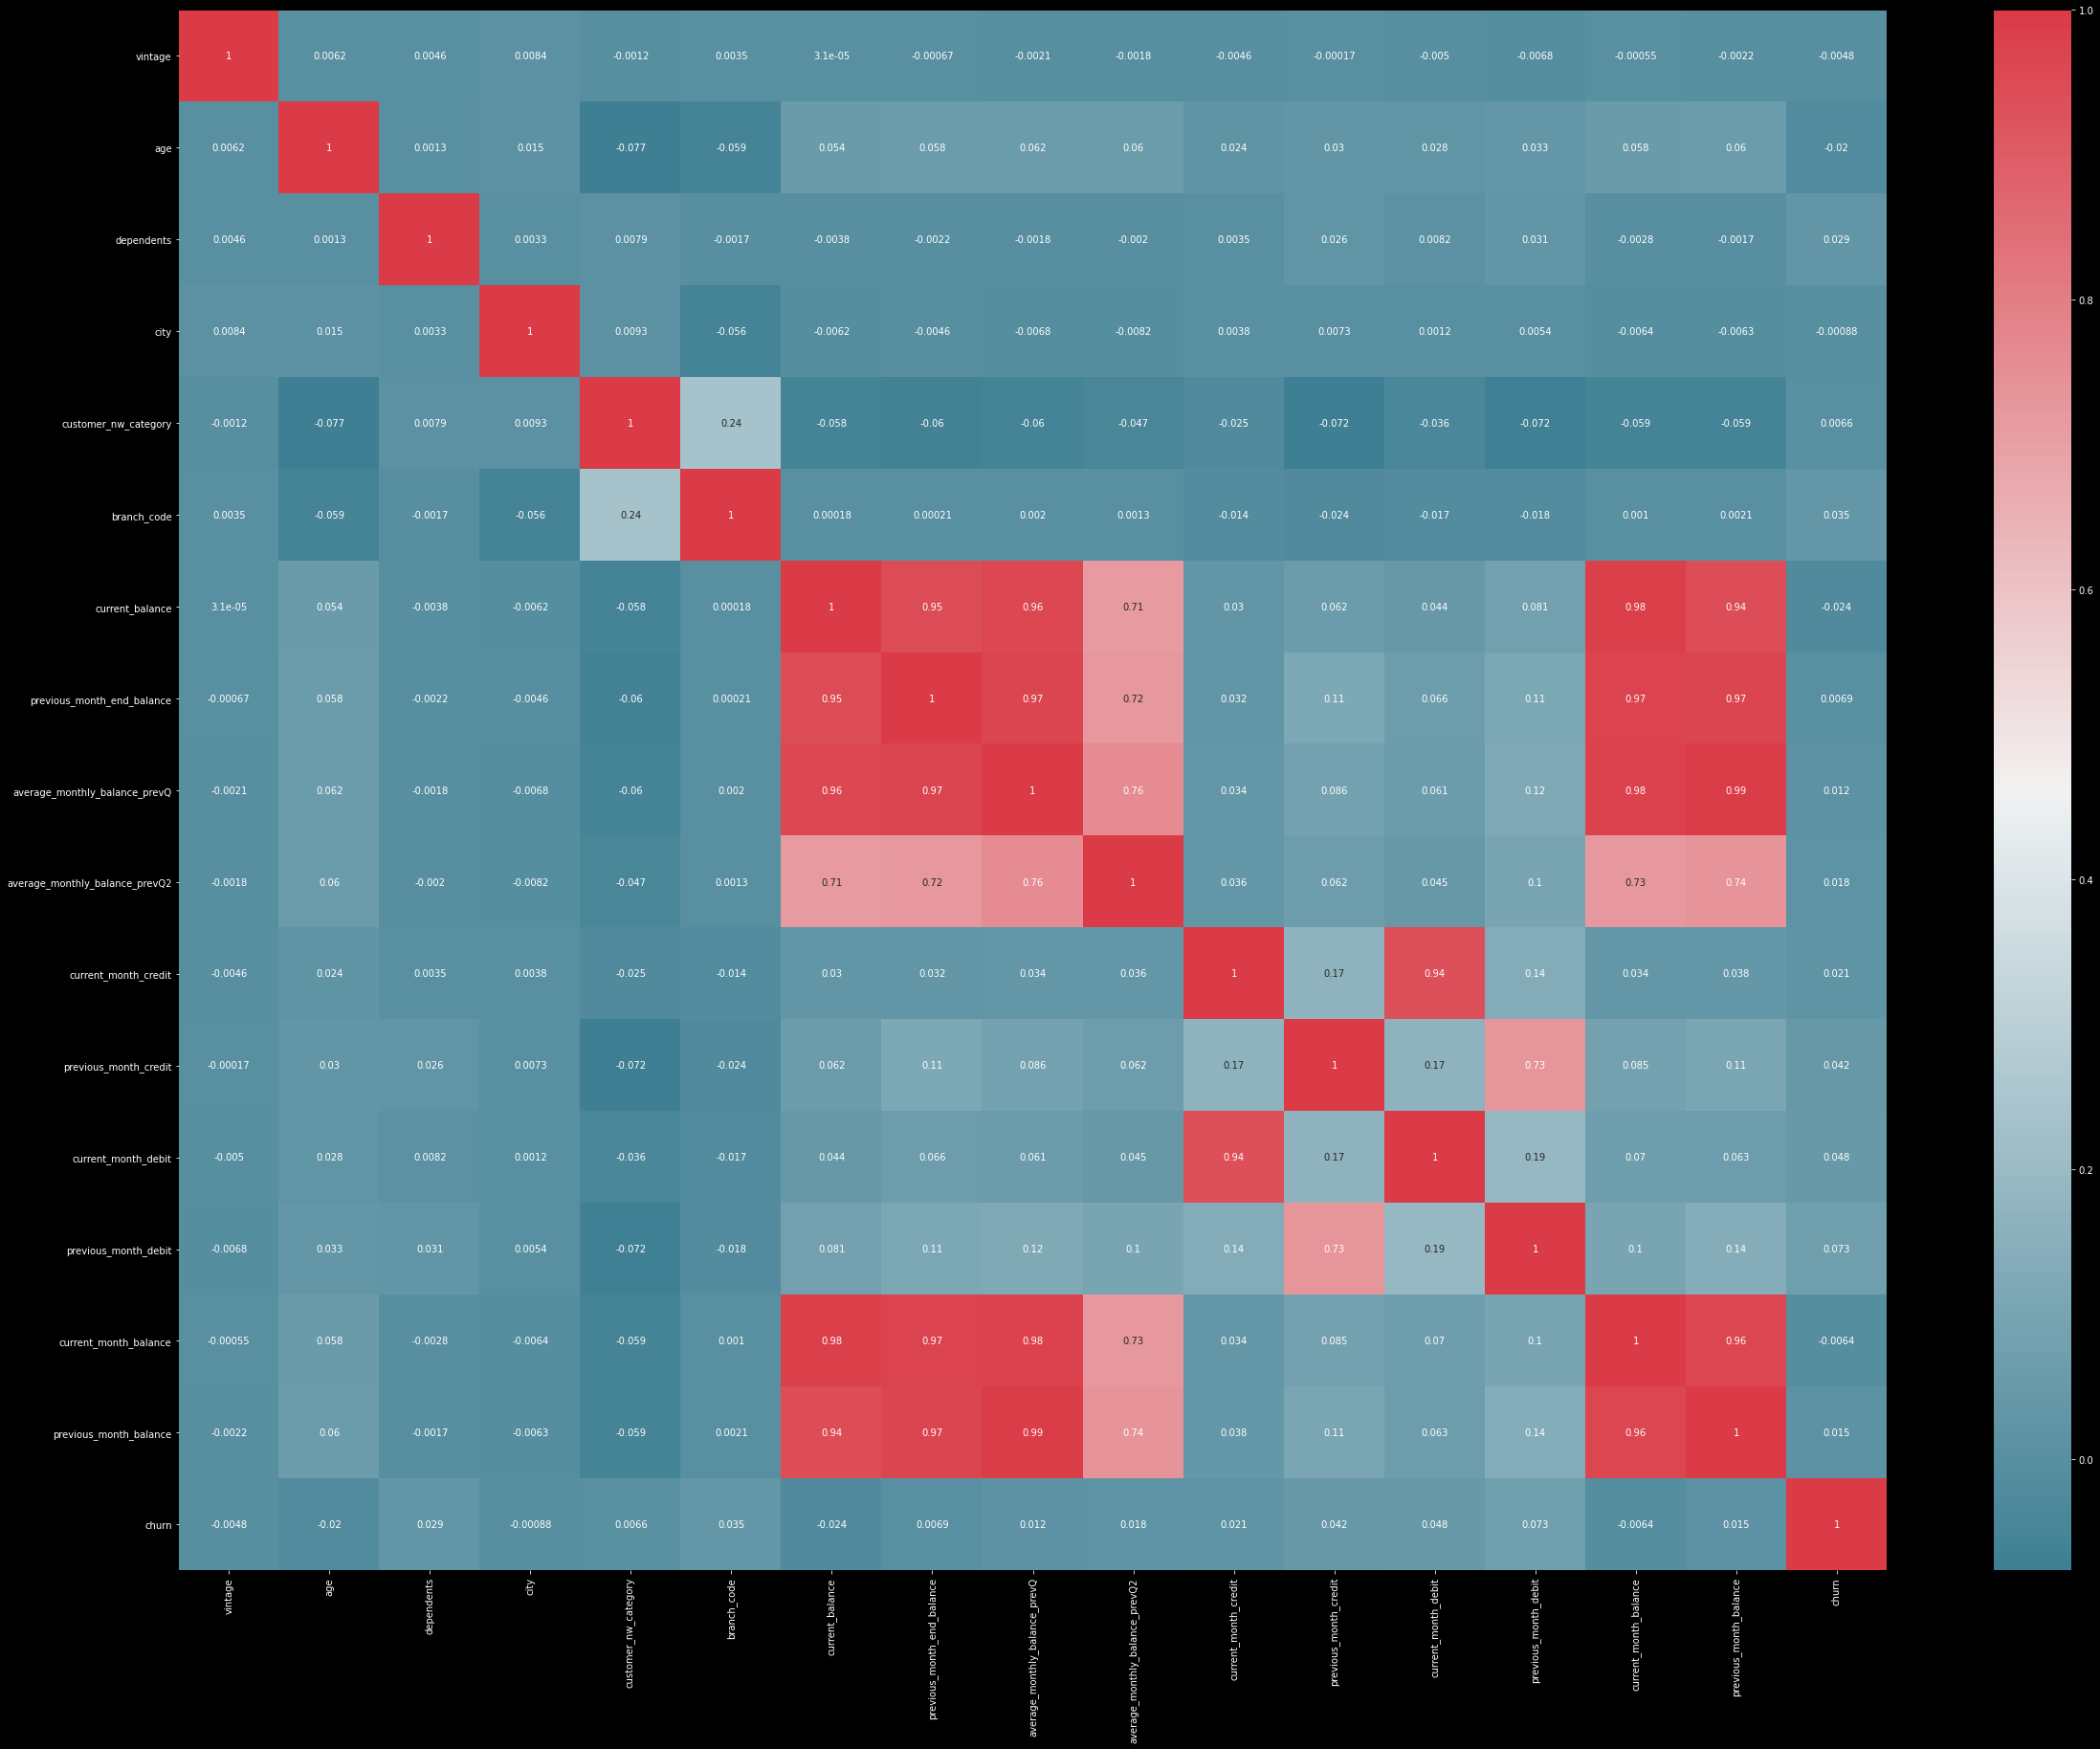

In [295]:
#heat map for correlation
import seaborn as sns
def correlation(data):
  _ ,ax = plt.subplots(figsize = (40,30))
  colormap = sns.diverging_palette(220 , 10 , as_cmap = True)
  sns.heatmap(data.corr() , annot = True , cmap = colormap)
correlation(data)

In [296]:
#unique values in occupation
data['occupation'].unique()

array(['self_employed', 'salaried', 'retired', 'student', 'company'],
      dtype=object)

## **DATA TRANSFORMATION**

In [297]:
#mapping all the categorical variables for computation
data['gender'] = data['gender'].map({'Male' : '1' ,
                                      'Female': '0'})
data['occupation'] = data['occupation'].map({'student':'0',
                                             'retired':'1',
                                             'self_employed':'2',
                                             'salaried':'3',
                                             'company':'4'
                                              })
data

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,2101,66,1,0.0,2,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2348,35,1,0.0,2,1020.0,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,2194,31,1,0.0,3,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,2329,90,1,0.0,2,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,1579,42,1,2.0,2,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2325,10,0,0.0,0,1020.0,2,1207,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,1537,34,0,0.0,2,1046.0,2,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,2376,47,1,0.0,3,1096.0,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,1745,50,1,3.0,2,1219.0,3,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [298]:
#segregating X(independent variable) and Y(independent variable)
Y = data['churn']
X = data.drop(columns = ['churn','last_transaction' , 'dependents' , 'customer_nw_category'])
X

,vintage,age,gender,occupation,city,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,2101,66,1,2,187.0,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71
1,2348,35,1,2,1020.0,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61
2,2194,31,1,3,146.0,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14
3,2329,90,1,2,1020.0,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79
4,1579,42,1,2,1494.0,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2325,10,0,0,1020.0,1207,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43
28378,1537,34,0,2,1046.0,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32
28379,2376,47,1,3,1096.0,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24
28380,1745,50,1,2,1219.0,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55


In [299]:
#scaling data using sklearn
from sklearn.preprocessing import  StandardScaler as ss 
scale = ss()
scaled_x = scale.fit_transform(X)
scaled_x

array([[ 0.03614561,  0.99914719,  0.81387401, ..., -0.13742664,
        -0.14256405, -0.14226472],
       [ 0.94199596, -0.74175593,  0.81387401, ..., -0.13329672,
        -0.02270474,  0.03045947],
       [ 0.37721477, -0.96638859,  0.81387401, ..., -0.12676727,
        -0.0581648 , -0.05715217],
       ...,
       [ 1.04468345, -0.06785795,  0.81387401, ..., -0.13448022,
         1.27583362,  1.18000495],
       [-1.26945246,  0.10061655,  0.81387401, ..., -0.13742664,
        -0.1385948 , -0.13833271],
       [-3.35987634, -1.69644473,  0.81387401, ..., -0.09241186,
        -0.12010775, -0.09979906]])

In [300]:
#splitting the dataset into train and test data
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_x, Y, train_size = 0.80, stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22705, 16), (5677, 16), (22705,), (5677,))

### **Model Building, predictions and odds ratio**

In [301]:

from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced' ,max_iter=1000)

classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [302]:


predicted_values = classifier.predict(x_test)              # Predicting class
predicted_probabilities = classifier.predict_proba(x_test) # Predicting probabilities

In [303]:
predicted_values

array([0, 0, 0, ..., 0, 0, 1])

## **Evaluation Metrics**

In [304]:
#Accuracy
classifier.score(x_test, y_test)

0.789325347895015

In [305]:


#calculating the precision score
from sklearn.metrics import precision_score
Precision = precision_score(y_test, predicted_values)
Precision

0.44922425952045136

In [306]:
#calculating recall score
from sklearn.metrics import recall_score
Recall = recall_score(y_test, predicted_values)
Recall

0.6055133079847909

In [307]:
#calculating the f1-score
from sklearn.metrics import f1_score
F1 = f1_score(y_test, predicted_values)
F1

0.5157894736842106

# **Precision-Recall Curve** 

In [308]:
# gathering Precision/recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((5672,), (5672,), (5671,))

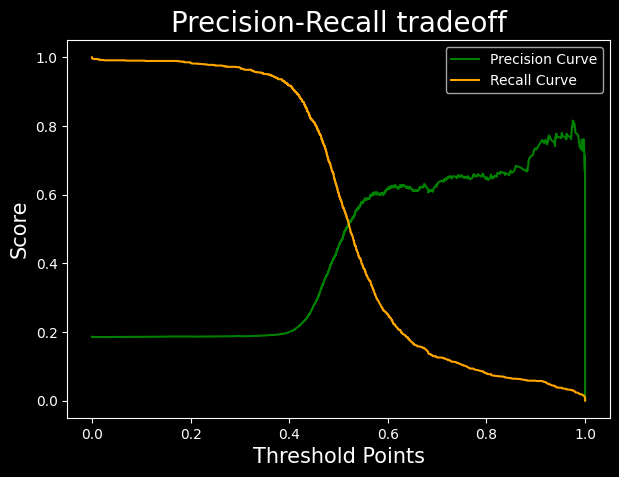

In [309]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( threshold_points, precision_points[:-1], color = 'green', label = 'Precision Curve')
plt.plot( threshold_points, recall_points[:-1], color = 'orange', label = 'Recall Curve')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()

# AUC-ROC Curve

In [310]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:,1])

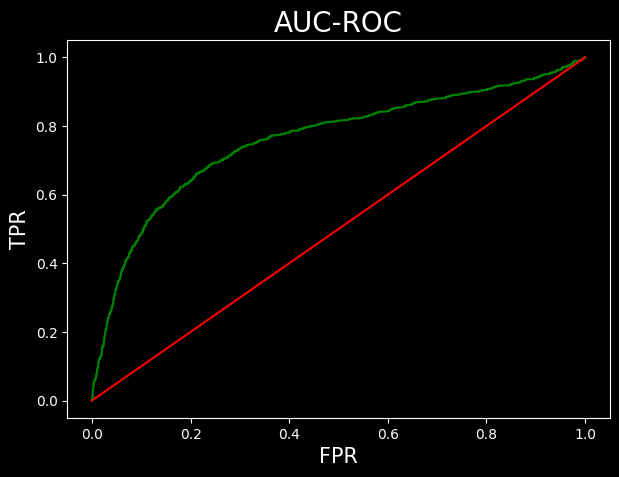

0.7601533244270887

In [311]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( fpr, tpr, color = 'green')
plt.plot( [0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test, predicted_probabilities[:,1])